### Load Packages & Modules

In [2]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn import feature_selection
from sklearn import model_selection

from sklearn import metrics

### Workbook Setup

In [3]:
## Print plots inline (in notebook)
%matplotlib inline

## Seaborn Setup
sns.set(context='notebook',
        style='darkgrid',
        palette='deep',
        font='sans-serif',
        font_scale=1,
        color_codes=True,
        rc=None,)

## Directory Setup
directory = '/Users/nw/Documents/projects/project_titanic/raw_data_files'
os.chdir(directory)

### Data Inputs

In [5]:
'''
import kaggle
kaggle.api.competition_download_files("titanic")

from zipfile import ZipFile

# Create a ZipFile Object and load sample.zip in it
with ZipFile('titanic.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()
'''    
    
train_data = pd.read_csv('train.csv')
validation_data = pd.read_csv('test.csv')

### Feature Cleanup & Missing Values

In [6]:
### Clean up Fare (Remove 0s & Replace with Mean)
mean_fare = train_data.Fare.mean()
train_data.Fare = train_data.Fare.replace(to_replace = 0, value = mean_fare)

## Clean up Age (Replace missing value with mean)
mean_age = train_data.Age.mean()
train_data.Age = train_data.Age.fillna(value = mean_age)

## Embarked Cleanup - Replace with most common value
train_data.Embarked = train_data.Embarked.fillna(train_data.Embarked.value_counts().index[0])

##### Validation Data #####
### Clean up Fare (Remove 0s & NaNs - Replace with Mean)
validation_data.Fare = validation_data.Fare.replace(to_replace = 0, value = mean_fare)
validation_data.Fare = validation_data.Fare.fillna(mean_fare)

### Clean up Age (Replace NULLs with Mean)
validation_data.Age = validation_data.Age.fillna(mean_age)


### Feature Generation


In [7]:
## Bin Fares into hundred buckets
train_data['FareBinned'] = np.floor((train_data.Fare/100).values) + 1

## Log value of Fares
train_data['FareLog'] = np.log((train_data.Fare/100).values)

## Total Accompying Passengers
train_data['AccomPass'] = train_data.Parch + train_data.SibSp

parch_and_sib = []
for i in train_data.index:
    if (train_data.Parch[i] > 0) & (train_data.SibSp[i] > 0):
        parch_and_sib.append(1)
    else:
        parch_and_sib.append(0)

train_data['ParchAndSib'] = parch_and_sib

## Cabin letter & Had Cabin 
cabin_prelist = []
had_cabin = []
for values in train_data.Cabin:
    if  type(values) == str:
        values = values.lstrip()
        cabin_prelist.append(values[0]) 
        had_cabin.append(1)
    else:
        cabin_prelist.append("No Cabin")
        had_cabin.append(0)
        
train_data['CabinLetter'] = cabin_prelist
train_data['HadCabin'] = had_cabin


## Titles
titles = []
for i in train_data.Name:
    if 'Miss.' in i:
        titles.append('Miss')
    elif 'Lady.' in i:
        titles.append('Miss')
    elif 'Mlle.' in i:
        titles.append('Miss')
    elif 'Ms.' in i:
        titles.append('Miss')
    elif 'Mme.' in i:
        titles.append('Miss')
    elif 'Mr.' in i:
        titles.append('Mr')
    elif 'Sir.' in i:
        titles.append('Mr')
    elif 'Mrs.' in i:
        titles.append('Mrs')
    elif 'Master.' in i:
        titles.append('Master')
    else:
        titles.append('Unknown')

train_data['Title'] = titles
        
## All numeric ticket type
num_ticket_type = []
for value in train_data.Ticket:
    if value.isdigit():
        num_ticket_type.append(1)
    else:
        num_ticket_type.append(0)

train_data['AllNumTicket'] = num_ticket_type


##### Validation Data #####
## Bin Fares into hundred buckets
validation_data['FareBinned'] = np.floor((validation_data.Fare/100).values) + 1

## Log value of Fares
validation_data['FareLog'] = np.log((validation_data.Fare/100).values)


## Total Accompying Passengers
validation_data['AccomPass'] = validation_data.Parch + validation_data.SibSp

parch_and_sib = []
for i in validation_data.index:
    if (validation_data.Parch[i] > 0) & (validation_data.SibSp[i] > 0):
        parch_and_sib.append(1)
    else:
        parch_and_sib.append(0)

validation_data['ParchAndSib'] = parch_and_sib

## Cabin letter & Had Cabin 
cabin_prelist = []
had_cabin = []
for values in validation_data.Cabin:
    if  type(values) == str:
        values = values.lstrip()
        cabin_prelist.append(values[0]) 
        had_cabin.append(1)
    else:
        cabin_prelist.append("No Cabin")
        had_cabin.append(0)
        
validation_data['CabinLetter'] = cabin_prelist
validation_data['HadCabin'] = had_cabin


## Titles
titles = []
for i in validation_data.Name:
    if 'Miss.' in i:
        titles.append('Miss')
    elif 'Lady.' in i:
        titles.append('Miss')
    elif 'Mlle.' in i:
        titles.append('Miss')
    elif 'Ms.' in i:
        titles.append('Miss')
    elif 'Mme.' in i:
        titles.append('Miss')
    elif 'Mr.' in i:
        titles.append('Mr')
    elif 'Sir.' in i:
        titles.append('Mr')
    elif 'Mrs.' in i:
        titles.append('Mrs')
    elif 'Master.' in i:
        titles.append('Master')
    else:
        titles.append('Unknown')

validation_data['Title'] = titles
        
## All numeric ticket type
num_ticket_type = []
for value in validation_data.Ticket:
    if value.isdigit():
        num_ticket_type.append(1)
    else:
        num_ticket_type.append(0)

validation_data['AllNumTicket'] = num_ticket_type
        

### High Level Analysis

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64
342 survived out of 891

-------
Dataframe Description - Numeric Values

           Pclass         Age       SibSp       Parch        Fare   AccomPass  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     2.308642   29.699118    0.523008    0.381594   32.746366    0.904602   
std      0.836071   13.002015    1.102743    0.806057   49.514272    1.613459   
min      1.000000    0.420000    0.000000    0.000000    4.012500    0.000000   
25%      2.000000   22.000000    0.000000    0.000000    7.925000    0.000000   
50%      3.000000   29.699118    0.000000    0.000000   15.100000    0.000000   
75%      3.000000   35.000000    1.000000    0.000000   32.204208    1.000000   
max      3.000000   80.000000    8.000000    6.000000  512.329200   10.000000   

      

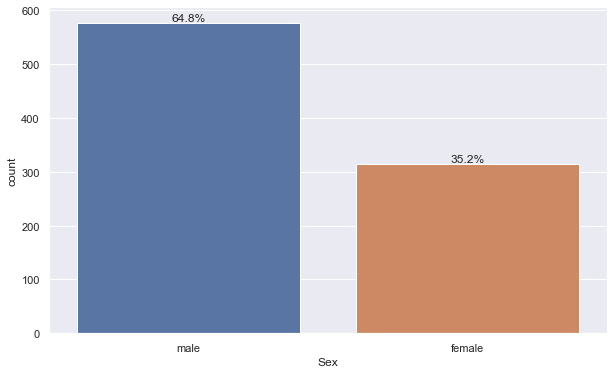

/Users/nw/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


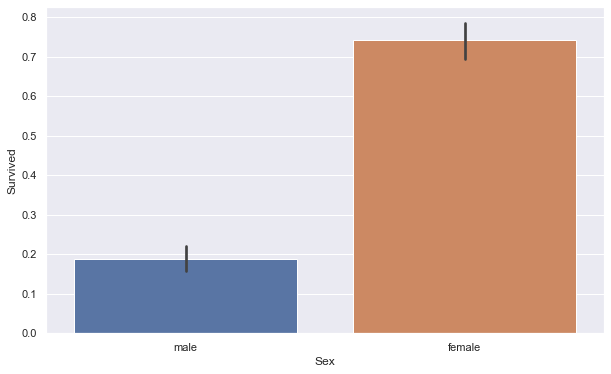


-------
Pclass



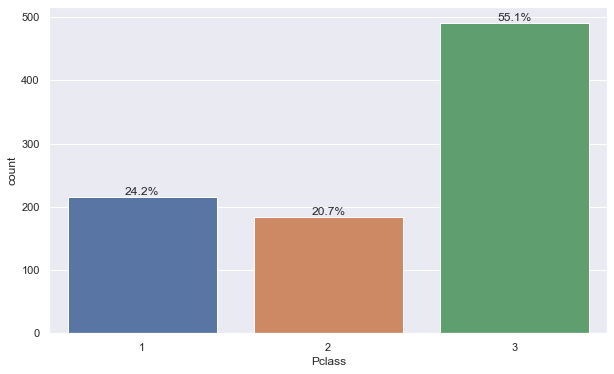

/Users/nw/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


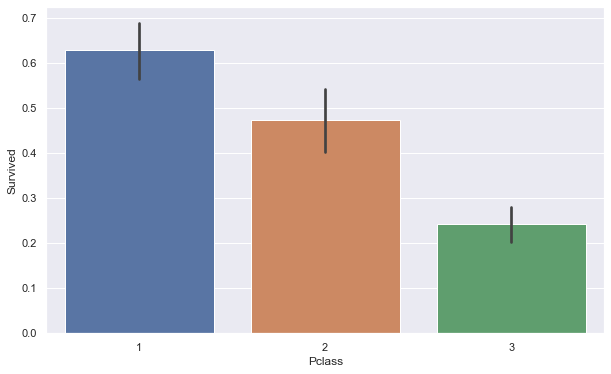


-------
Embarked



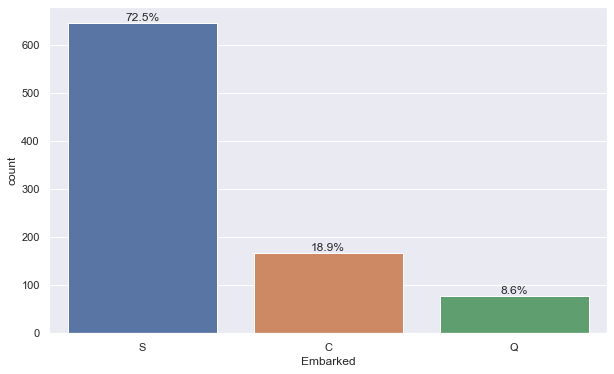

/Users/nw/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


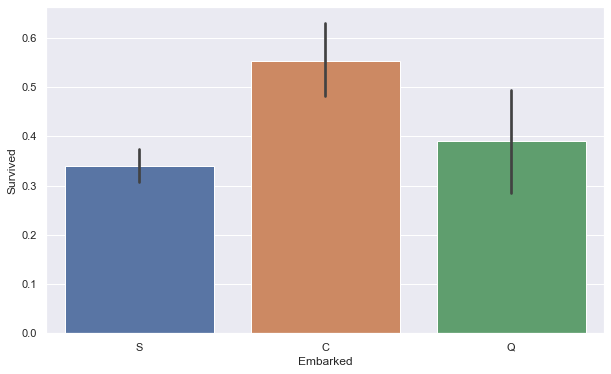


-------
SibSp



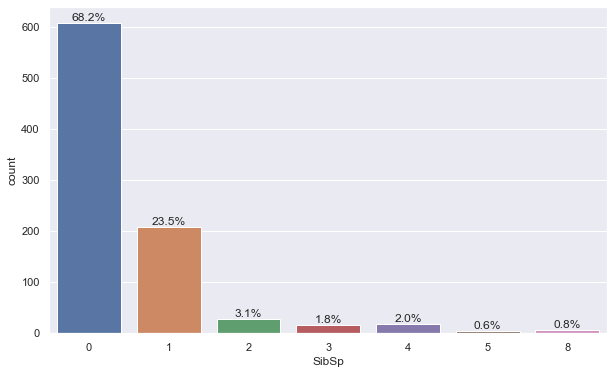

/Users/nw/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


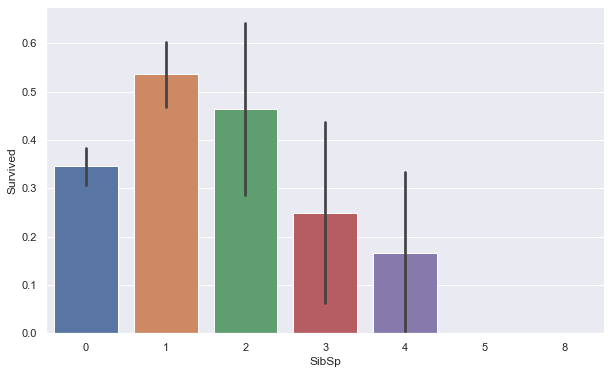


-------
Parch



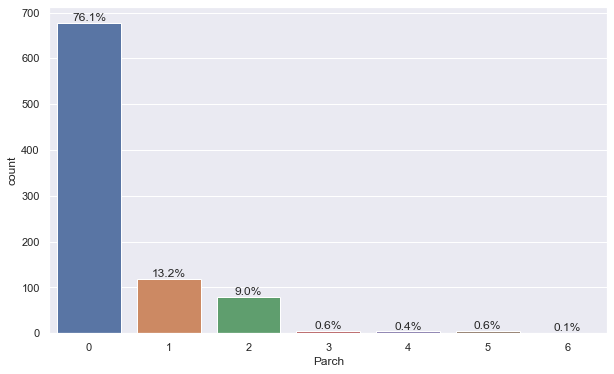

/Users/nw/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


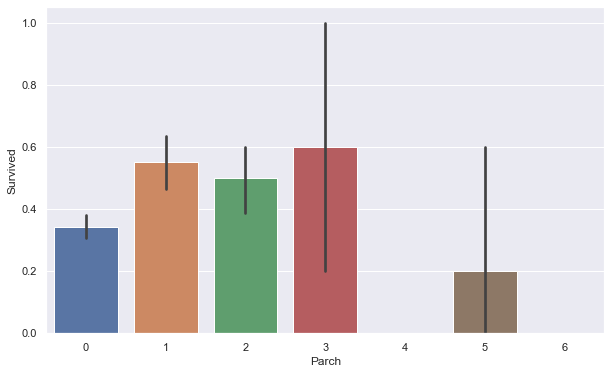


-------
CabinLetter



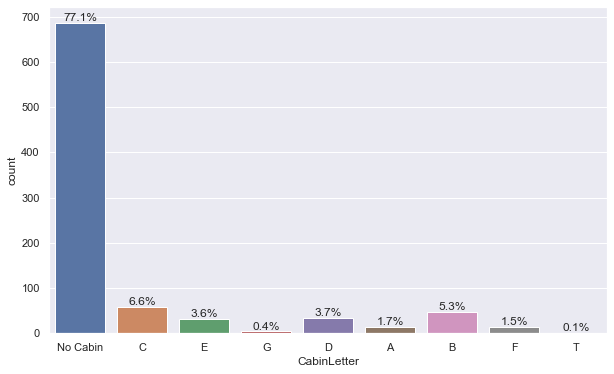

/Users/nw/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


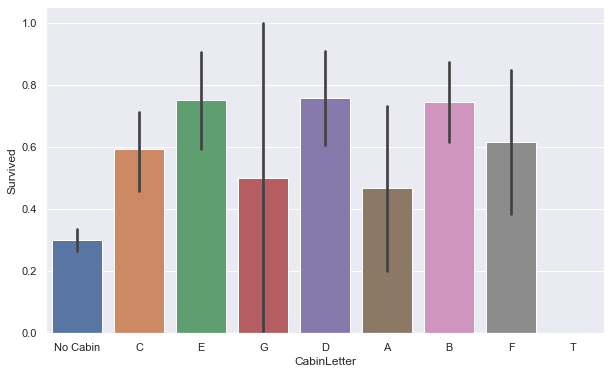


-------
Title



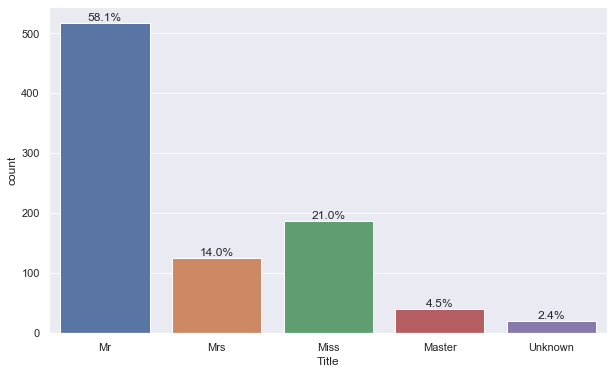

/Users/nw/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


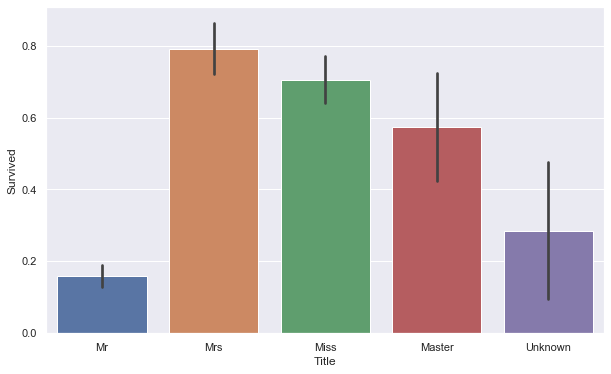


-------
HadCabin



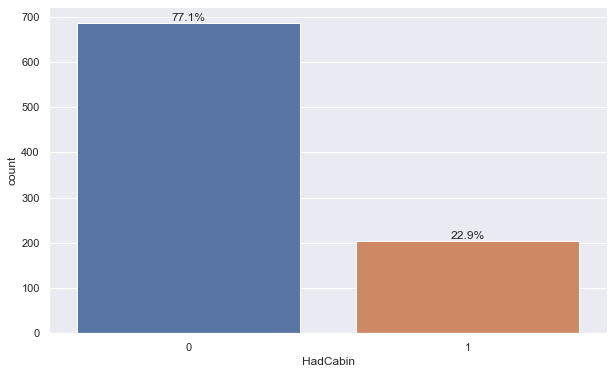

/Users/nw/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


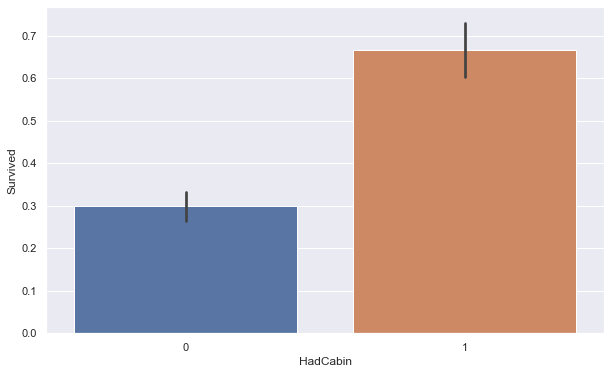


-------
ParchAndSib



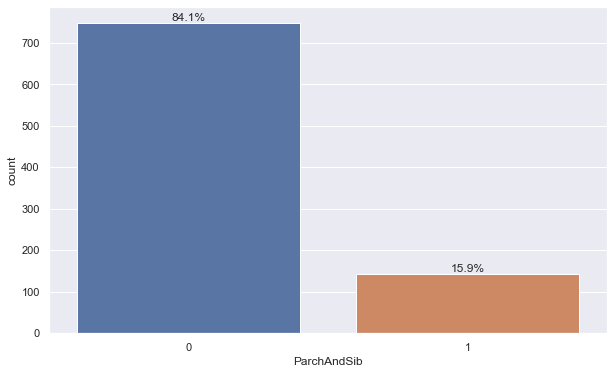

/Users/nw/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


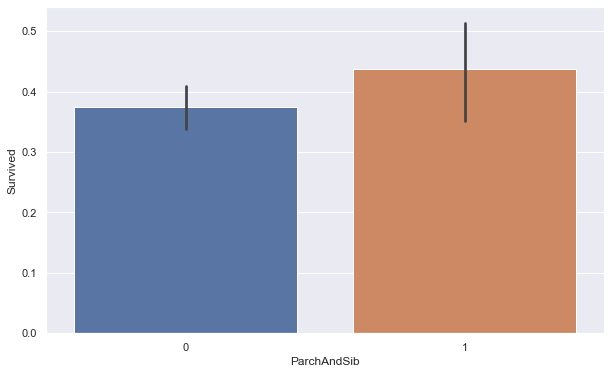


-------
AllNumTicket



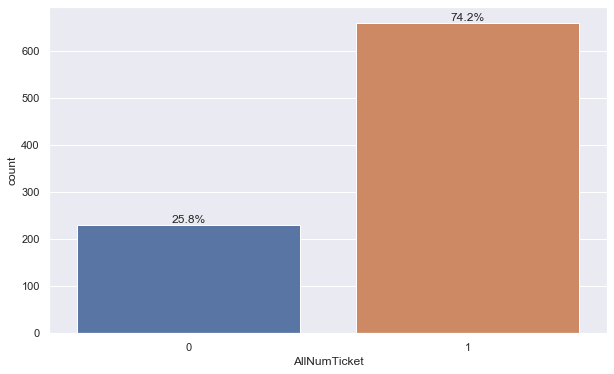

/Users/nw/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


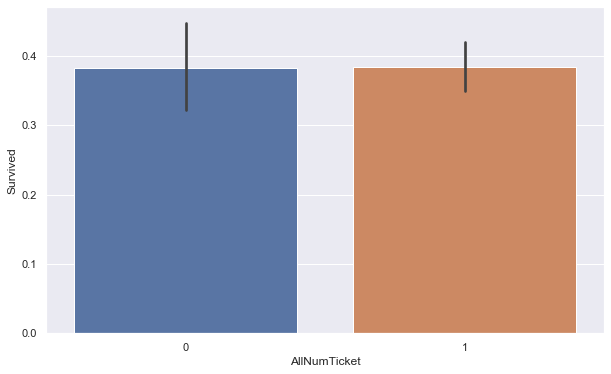

/Users/nw/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



-------
Age



/Users/nw/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


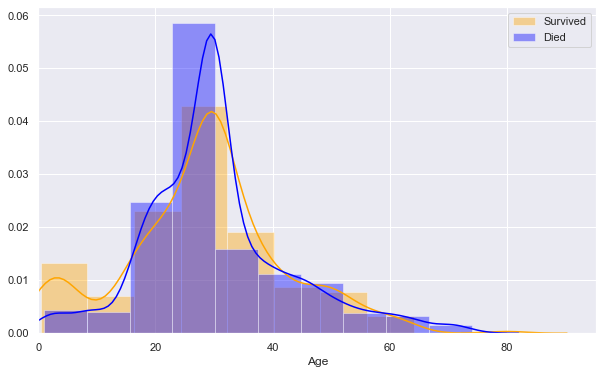


-------
Fare



/Users/nw/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/nw/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


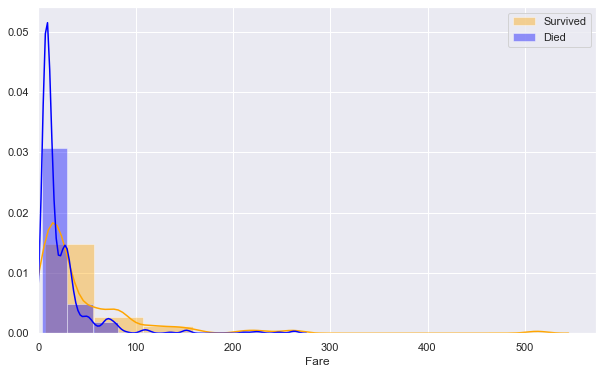


-------
FareBinned



/Users/nw/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

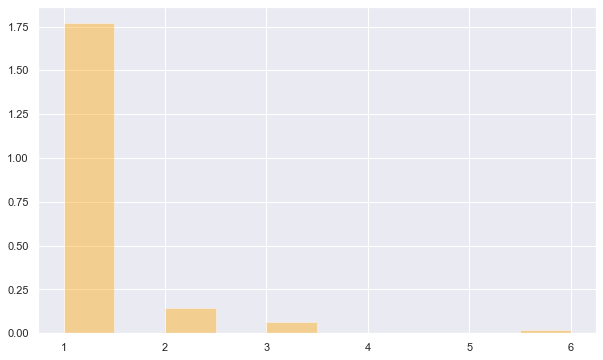

In [8]:
## Describe dependent variable
print(train_data.Survived.describe())
## 38.4% Survival Rate (out of 891)
print(f"{train_data.Survived.sum()} survived out of {len(train_data)}")

## Describe dataframe 
print('\n-------\nDataframe Description - Numeric Values\n')
print(train_data.loc[:,['Pclass','Age','SibSp','Parch','Fare',
                        'AccomPass','FareBinned','HadCabin','ParchAndSib',
                        'AllNumTicket']].describe(include = 'all'))

print('\n-------\nDataframe Description - Categorical Values\n')
print(train_data.loc[:,['Sex','Ticket','Name','Cabin','Embarked','CabinLetter','Title']].describe(include = 'all'))


def countplot_graphing(data, column):
    ## Passenger Class
    print(f'\n-------\n{column}\n')
    plt.figure(figsize=(10,6))
    ax = sns.countplot(x = column, data = data,);
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/len(data)), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
    plt.show()
    
    plt.figure(figsize=(10,6))
    sns.barplot(x = column, y = 'Survived', data = data);
    plt.show()

def distplot_graphing(data, column, xlim = 0):
    print(f'\n-------\n{column}\n')
    plt.figure(figsize=(10,6))
    sns.distplot(data[data.Survived == 1][column], color = 'Orange', bins = 10)
    sns.distplot(data[data.Survived == 0][column], color = 'Blue', bins = 10)
    plt.xlim(xlim, None);
    plt.legend(['Survived', 'Died'])
    plt.show()
    
def facet_hist_graphing(data, column1, column2, bins = 10):
    plt.figure(figsize=(10,6))
    print(f"{column1} by {column2} Distribution")
    grid = sns.FacetGrid(data, col='Survived', row=column1, height=4, aspect=2)
    grid.map(plt.hist, column2,  bins=bins)
    plt.show();

for i in ['Sex','Pclass','Embarked','SibSp','Parch','CabinLetter','Title','HadCabin','ParchAndSib','AllNumTicket']:
    countplot_graphing(train_data, i)

for i in [['Age',0],['Fare',0],['FareBinned',0],['FareLog',None]]:
    distplot_graphing(train_data,i[0],i[1])
    
for i in [['Pclass', 'Age', 10],['Embarked','Age',10], ['Sex', 'Age',10] , ['Sex', 'Pclass',3]]:
    facet_hist_graphing(train_data, i[0],i[1], i[2])


### Performance Functions

In [7]:
def perf_measure(estimate_name, truth, pred):
    global model_performance_df
    
    print(f'{estimate_name}:\n')
    tn, fp, fn, tp = metrics.confusion_matrix(truth, pred).ravel()
    print(f'Confusion Matrix: \n TP | FP \n {tp} | {fp} \n----------\n {fn} | {tn} \n FN | TN \n')
    
    acc = metrics.accuracy_score(truth, pred)
    precision = metrics.precision_score(truth, pred)
    recall = metrics.recall_score(truth, pred)
    f1_score = metrics.f1_score(truth, pred)
    mcc = metrics.matthews_corrcoef(truth, pred)
    auc = metrics.roc_auc_score(truth, pred)
    
    print(f"Accuracy = {acc}")
    print('Calc: (TP+FN)/(TP+FP+FN+FN)\n')
    
    print(f"Precision Score: {precision}")
    print('Calc: TP / (TP + FP)\n')
    print(f"Recall Score: {recall}")
    print('Calc: TP / (TP + FN)\n')
    print(f"F1 Score: {f1_score}")
    print('Calc: 2*[(Recall * Precision)/(Precision + Recall)] - In Range of 0 to 1\n')

    print(f"MCC Score: {mcc}")
    print('Calc: (TP*TN - FP*FN)/√[(TP+FP)*(FP+FN)*(TN+FP)*(TN+FN)] - In Range of -1 (Predicting the inverse) to 1\n')

    print(f"AUC: {auc}")
    
    
    ### Create or Update the Model Performance Dataframe
    mp_df_cols = ['Model Name','Accuracy','Precision','Recall','F1 Score','MCC','AUC']
    if 'model_performance_df' not in globals():
        model_performance_df = pd.DataFrame(columns = mp_df_cols, index = None)
        
    temp_df = pd.DataFrame(data = [[estimate_name, acc, precision, recall, f1_score, mcc, auc]],
                            columns = mp_df_cols)
    
    model_performance_df = model_performance_df.append(temp_df)
    
    
def estimator_plotting(estimator, X_train, X_test, y_train, y_test):
    print('Training - Confusin Matrix\n')
    metrics.plot_confusion_matrix(estimator, X_train, y_train, values_format = 'd', cmap = 'bone')
    plt.show()
    
    print('Test - Confusin Matrix\n')
    metrics.plot_confusion_matrix(estimator, X_test, y_test, values_format = 'd', cmap = 'bone')
    plt.show()
    
    print('Training - ROC\n')
    metrics.plot_roc_curve(estimator, X_train, y_train, drop_intermediate = False)
    plt.show()
    
    print('Test - ROC\n')
    metrics.plot_roc_curve(estimator, X_test, y_test, drop_intermediate = False);
    plt.show();

### Original Estimate - Human Judgement - No Estimator Used

In [8]:
## Make an estimate based on "instinct"
# SurviveCriteria:
# - Females & in Class 1 & 2 
# - Females < 40
# - Class 1 & Between 18 & 50 
# - Title is Mrs

org_pred = (np.array(((train_data.Sex == 'female') & (train_data.Pclass <= 2)) | 
                   ((train_data.Sex == 'female') & (train_data.Age < 40)) | 
                   ((train_data.Pclass == 1) & (train_data.Age >= 18) & 
                                                (train_data.Age <= 50)) |
                     (train_data.Title == 'Mrs')
                    )*1).tolist()

org_true = train_data.Survived

perf_measure('Original Estimate',org_true, org_pred)


Original Estimate:

Confusion Matrix: 
 TP | FP 
 269 | 136 
----------
 73 | 413 
 FN | TN 

Accuracy = 0.7654320987654321
Calc: (TP+FN)/(TP+FP+FN+FN)

Precision Score: 0.6641975308641975
Calc: TP / (TP + FP)

Recall Score: 0.7865497076023392
Calc: TP / (TP + FN)

F1 Score: 0.7202141900937081
Calc: 2*[(Recall * Precision)/(Precision + Recall)] - In Range of 0 to 1

MCC Score: 0.5262626954049622
Calc: (TP*TN - FP*FN)/√[(TP+FP)*(FP+FN)*(TN+FP)*(TN+FN)] - In Range of -1 (Predicting the inverse) to 1

AUC: 0.7694132873166524


### Categorical Encoding

In [9]:
## Label Encoding
## - Sex

## OneHot Encoding
## - Embarked
## - CabinLetter
## - Title

## Create instance of LabelEncoder object 
sex_enc = preprocessing.LabelEncoder().fit(train_data.Sex.values)

train_data.Sex = sex_enc.transform(train_data.Sex.values).tolist()

## Get Unique values to be encoded
embarked_unq = set(train_data.Embarked.values.tolist())
cabin_letter_unq = set(train_data.CabinLetter.values.tolist())
title_unq = set(train_data.Title.values.tolist())

## Encode using Onehot encoder
onehot_enc = preprocessing.OneHotEncoder(drop='first').fit(train_data.loc[:,['Embarked','CabinLetter','Title']].values)

onehot_encoded = onehot_enc.transform(train_data.loc[:,['Embarked','CabinLetter','Title']].values).toarray()
onehot_encoded_df = pd.DataFrame(data=onehot_encoded, columns=onehot_enc.get_feature_names().tolist())


train_data = train_data.merge(onehot_encoded_df, left_index=True, right_index=True)

## Drop columns that have been encoded and uneeded column
train_data = train_data.drop(['Embarked','CabinLetter','Title', 'PassengerId','Name','Ticket','Cabin'], axis = 1)


##### validation Data #####
## Onehot encoder
onehot_encoded = onehot_enc.transform(validation_data.loc[:,['Embarked','CabinLetter','Title']].values).toarray()
onehot_encoded_df = pd.DataFrame(data=onehot_encoded, columns=onehot_enc.get_feature_names().tolist())


validation_data = validation_data.merge(onehot_encoded_df, left_index=True, right_index=True)

## Sex
validation_data.Sex = sex_enc.transform(validation_data.Sex.values).tolist()


validation_data_pass_id = validation_data.PassengerId
validation_data = validation_data.drop(['PassengerId','Name','Ticket','Cabin','Embarked','Title','CabinLetter'], axis = 1)

### Correlation Analysis

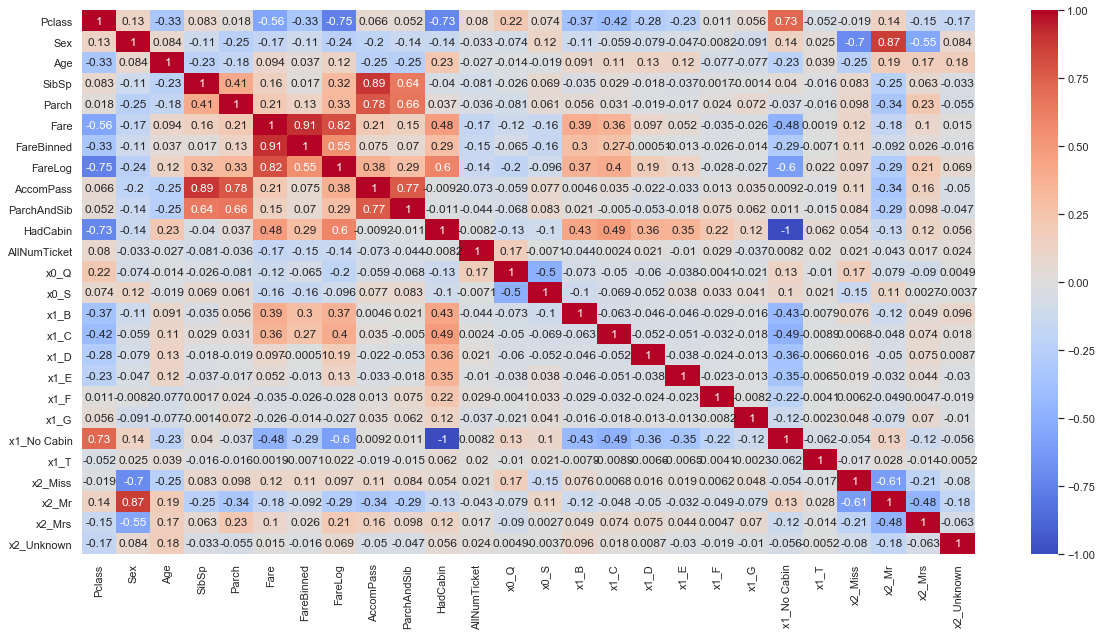

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(train_data.iloc[:,1:].corr(), vmin = -1, vmax = 1 ,cmap = 'coolwarm', annot=True);

### Create Dependent & Independent Variable Split 

In [11]:
## drop columns base on high correlation
#train_data = train_data.drop(['FareBinned','FareLog'], axis =1)

## Create X & y Matrics
y = train_data.Survived.values
X = train_data.iloc[:,1:].values

## Create Columns for X matrix
X_cols = train_data.iloc[:,1:].columns

### Feature Scaling

In [16]:
#min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0,1)).fit(X)
min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0,1)).fit(X)

X_scaled = min_max_scaler.transform(X)

##### Validation Data #####

## Create X Matrics
X_val = validation_data.values

X_val_scaled = min_max_scaler.transform(X_val)

X_validate = X_val_scaled.copy()

### Train Test Split

In [17]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_scaled,y, test_size = 0.2, random_state = 1111)

# Model Build

### V1 - Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

v1_lr = LogisticRegression(max_iter=1000, random_state=1111)
v1_lr = v1_lr.fit(X_train, y_train)
y_pred = v1_lr.predict(X_test)

perf_measure('Logistic Regression V1 Estimate',y_test, y_pred)

model_performance_df

Logistic Regression V1 Estimate:

Confusion Matrix: 
 TP | FP 
 56 | 7 
----------
 22 | 94 
 FN | TN 

Accuracy = 0.8379888268156425
Calc: (TP+FN)/(TP+FP+FN+FN)

Precision Score: 0.8888888888888888
Calc: TP / (TP + FP)

Recall Score: 0.717948717948718
Calc: TP / (TP + FN)

F1 Score: 0.7943262411347517
Calc: 2*[(Recall * Precision)/(Precision + Recall)] - In Range of 0 to 1

MCC Score: 0.6734628479462067
Calc: (TP*TN - FP*FN)/√[(TP+FP)*(FP+FN)*(TN+FP)*(TN+FN)] - In Range of -1 (Predicting the inverse) to 1

AUC: 0.8243208936278243


,Model Name,Accuracy,Precision,Recall,F1 Score,MCC,AUC
0,Original Estimate,0.765432,0.664198,0.786550,0.720214,0.526263,0.769413
0,Logistic Regression V1 Estimate,0.837989,0.888889,0.717949,0.794326,0.673463,0.824321
0,Logistic Regression V2 Estimate,0.849162,0.904762,0.730769,0.808511,0.697054,0.835682
0,Decision Tree Classifier V1 Estimate,0.793296,0.788732,0.717949,0.751678,0.577179,0.784717
0,Random Forest Classifier V1 Estimate,0.849162,0.880597,0.756410,0.813793,0.693873,0.838601
0,Random Forest Classifier V2 Estimate,0.849162,0.880597,0.756410,0.813793,0.693873,0.838601
0,LinearSVC Classifier V1 Estimate,0.837989,0.888889,0.717949,0.794326,0.673463,0.824321
0,LinearSVC Classifier V2 Estimate,0.837989,0.888889,0.717949,0.794326,0.673463,0.824321
0,LinearSVC Classifier V2 Estimate,0.837989,0.888889,0.717949,0.794326,0.673463,0.824321
0,XG Boost V1 Estimate,0.837989,0.901639,0.705128,0.791367,0.675535,0.822861


Training - Confusin Matrix



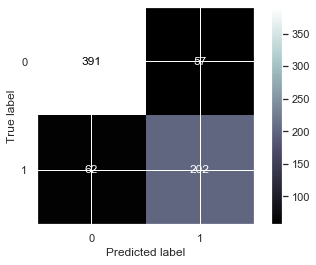

Test - Confusin Matrix



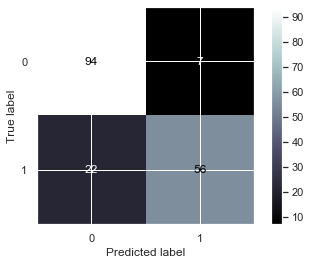

Training - ROC



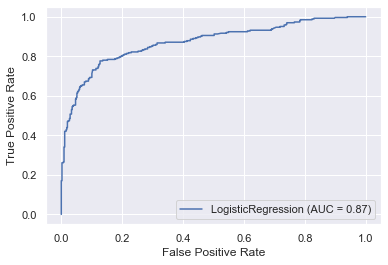

Test - ROC



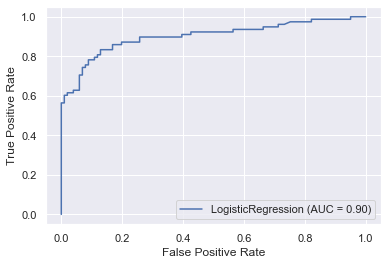

In [34]:
estimator_plotting(v1_lr, X_train, X_test, y_train, y_test)

In [35]:
v1_lr_coef = pd.DataFrame(zip(X_cols,v1_lr.coef_[0]))
v1_lr_coef.sort_values(by = 1)


,0,1
23,x2_Mr,-2.340431
2,Age,-2.101879
25,x2_Unknown,-1.395083
8,AccomPass,-1.361180
0,Pclass,-1.281050
3,SibSp,-1.254346
4,Parch,-0.596172
19,x1_G,-0.529880
1,Sex,-0.510750
12,x0_Q,-0.458890


### V2 - Logistic Regression

#### Univariate Feature Selection

In [36]:
from sklearn.feature_selection import RFE
def rec_feature_elimination(estimator, X_train, y_train, n_features_to_select):
    ## Create instance of Recursive Feature Elimination (RFE) object
    feature_selector = RFE(estimator, 
                           n_features_to_select = n_features_to_select)

    
    ## Fit the RFE instance to the datasets
    feature_selector = feature_selector.fit(X_train, y_train)

    print(f"Keep: {X_cols[feature_selector.support_].values}\n")
    print(f"Remove: {X_cols[feature_selector.support_ == False].values}\n" )

    remove_cols = []
    count = 0
    for i in feature_selector.support_:
        if i == False:
            remove_cols.append(count)
            count += 1

        else:
            count += 1

    fs_X_train = np.delete(X_train,remove_cols , axis = 1)
    fs_X_test = np.delete(X_test,remove_cols , axis = 1)
    fs_X_validate = np.delete(X_validate,remove_cols , axis = 1)
    
    
    return fs_X_train, fs_X_test, fs_X_validate

In [37]:
lr_X_train, lr_X_test, lr_X_validate = rec_feature_elimination(v1_lr, X_train, y_train, 15)

v2_lr = LogisticRegression(max_iter=1000, random_state=1111)
v2_lr = v2_lr.fit(lr_X_train, y_train)
y_pred = v2_lr.predict(lr_X_test)

perf_measure('Logistic Regression V2 Estimate',y_test, y_pred)

model_performance_df

Keep: ['Pclass' 'Age' 'SibSp' 'Parch' 'Fare' 'AccomPass' 'x0_Q' 'x1_C' 'x1_D'
 'x1_E' 'x1_G' 'x1_No Cabin' 'x2_Mr' 'x2_Mrs' 'x2_Unknown']

Remove: ['Sex' 'FareBinned' 'FareLog' 'ParchAndSib' 'HadCabin' 'AllNumTicket'
 'x0_S' 'x1_B' 'x1_F' 'x1_T' 'x2_Miss']

Logistic Regression V2 Estimate:

Confusion Matrix: 
 TP | FP 
 57 | 6 
----------
 21 | 95 
 FN | TN 

Accuracy = 0.8491620111731844
Calc: (TP+FN)/(TP+FP+FN+FN)

Precision Score: 0.9047619047619048
Calc: TP / (TP + FP)

Recall Score: 0.7307692307692307
Calc: TP / (TP + FN)

F1 Score: 0.8085106382978723
Calc: 2*[(Recall * Precision)/(Precision + Recall)] - In Range of 0 to 1

MCC Score: 0.6970538165924632
Calc: (TP*TN - FP*FN)/√[(TP+FP)*(FP+FN)*(TN+FP)*(TN+FN)] - In Range of -1 (Predicting the inverse) to 1

AUC: 0.8356816450875857


,Model Name,Accuracy,Precision,Recall,F1 Score,MCC,AUC
0,Original Estimate,0.765432,0.664198,0.786550,0.720214,0.526263,0.769413
0,Logistic Regression V1 Estimate,0.837989,0.888889,0.717949,0.794326,0.673463,0.824321
0,Logistic Regression V2 Estimate,0.849162,0.904762,0.730769,0.808511,0.697054,0.835682
0,Decision Tree Classifier V1 Estimate,0.793296,0.788732,0.717949,0.751678,0.577179,0.784717
0,Random Forest Classifier V1 Estimate,0.849162,0.880597,0.756410,0.813793,0.693873,0.838601
0,Random Forest Classifier V2 Estimate,0.849162,0.880597,0.756410,0.813793,0.693873,0.838601
0,LinearSVC Classifier V1 Estimate,0.837989,0.888889,0.717949,0.794326,0.673463,0.824321
0,LinearSVC Classifier V2 Estimate,0.837989,0.888889,0.717949,0.794326,0.673463,0.824321
0,LinearSVC Classifier V2 Estimate,0.837989,0.888889,0.717949,0.794326,0.673463,0.824321
0,XG Boost V1 Estimate,0.837989,0.901639,0.705128,0.791367,0.675535,0.822861


### V1 - Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

v1_dt = DecisionTreeClassifier(random_state=1111)

v1_dt = v1_dt.fit(X_train, y_train)
y_pred = v1_dt.predict(X_test)

perf_measure('Decision Tree Classifier V1 Estimate',y_test, y_pred)

model_performance_df

Decision Tree Classifier V1 Estimate:

Confusion Matrix: 
 TP | FP 
 57 | 16 
----------
 21 | 85 
 FN | TN 

Accuracy = 0.7932960893854749
Calc: (TP+FN)/(TP+FP+FN+FN)

Precision Score: 0.7808219178082192
Calc: TP / (TP + FP)

Recall Score: 0.7307692307692307
Calc: TP / (TP + FN)

F1 Score: 0.7549668874172185
Calc: 2*[(Recall * Precision)/(Precision + Recall)] - In Range of 0 to 1

MCC Score: 0.5775078399689254
Calc: (TP*TN - FP*FN)/√[(TP+FP)*(FP+FN)*(TN+FP)*(TN+FN)] - In Range of -1 (Predicting the inverse) to 1

AUC: 0.7861766945925361


,Model Name,Accuracy,Precision,Recall,F1 Score,MCC,AUC
0,Original Estimate,0.765432,0.664198,0.786550,0.720214,0.526263,0.769413
0,Logistic Regression V1 Estimate,0.837989,0.888889,0.717949,0.794326,0.673463,0.824321
0,Logistic Regression V2 Estimate,0.849162,0.904762,0.730769,0.808511,0.697054,0.835682
0,Decision Tree Classifier V1 Estimate,0.793296,0.788732,0.717949,0.751678,0.577179,0.784717
0,Random Forest Classifier V1 Estimate,0.849162,0.880597,0.756410,0.813793,0.693873,0.838601
0,Random Forest Classifier V2 Estimate,0.849162,0.880597,0.756410,0.813793,0.693873,0.838601
0,LinearSVC Classifier V1 Estimate,0.837989,0.888889,0.717949,0.794326,0.673463,0.824321
0,LinearSVC Classifier V2 Estimate,0.837989,0.888889,0.717949,0.794326,0.673463,0.824321
0,LinearSVC Classifier V2 Estimate,0.837989,0.888889,0.717949,0.794326,0.673463,0.824321
0,XG Boost V1 Estimate,0.837989,0.901639,0.705128,0.791367,0.675535,0.822861


### V1 - Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

v1_rf = RandomForestClassifier(n_estimators = 1000, random_state=1111)

v1_rf = v1_rf.fit(X_train, y_train)
y_pred = v1_rf.predict(X_test)

perf_measure('Random Forest Classifier V1 Estimate',y_test, y_pred)

model_performance_df

Random Forest Classifier V1 Estimate:

Confusion Matrix: 
 TP | FP 
 58 | 9 
----------
 20 | 92 
 FN | TN 

Accuracy = 0.8379888268156425
Calc: (TP+FN)/(TP+FP+FN+FN)

Precision Score: 0.8656716417910447
Calc: TP / (TP + FP)

Recall Score: 0.7435897435897436
Calc: TP / (TP + FN)

F1 Score: 0.8
Calc: 2*[(Recall * Precision)/(Precision + Recall)] - In Range of 0 to 1

MCC Score: 0.6705922156537439
Calc: (TP*TN - FP*FN)/√[(TP+FP)*(FP+FN)*(TN+FP)*(TN+FN)] - In Range of -1 (Predicting the inverse) to 1

AUC: 0.8272404163493272


,Model Name,Accuracy,Precision,Recall,F1 Score,MCC,AUC
0,Original Estimate,0.765432,0.664198,0.786550,0.720214,0.526263,0.769413
0,Logistic Regression V1 Estimate,0.837989,0.888889,0.717949,0.794326,0.673463,0.824321
0,Logistic Regression V2 Estimate,0.849162,0.904762,0.730769,0.808511,0.697054,0.835682
0,Decision Tree Classifier V1 Estimate,0.793296,0.788732,0.717949,0.751678,0.577179,0.784717
0,Random Forest Classifier V1 Estimate,0.849162,0.880597,0.756410,0.813793,0.693873,0.838601
0,Random Forest Classifier V2 Estimate,0.849162,0.880597,0.756410,0.813793,0.693873,0.838601
0,LinearSVC Classifier V1 Estimate,0.837989,0.888889,0.717949,0.794326,0.673463,0.824321
0,LinearSVC Classifier V2 Estimate,0.837989,0.888889,0.717949,0.794326,0.673463,0.824321
0,LinearSVC Classifier V2 Estimate,0.837989,0.888889,0.717949,0.794326,0.673463,0.824321
0,XG Boost V1 Estimate,0.837989,0.901639,0.705128,0.791367,0.675535,0.822861


In [40]:
v1_rf_coef = pd.DataFrame(zip(X_cols,v1_rf.feature_importances_))
print(v1_rf_coef.sort_values(by = 1, ascending = False))

               0         1
2            Age  0.199162
7        FareLog  0.125662
5           Fare  0.123988
23         x2_Mr  0.120301
1            Sex  0.102794
0         Pclass  0.046571
8      AccomPass  0.045188
24        x2_Mrs  0.031367
22       x2_Miss  0.031119
3          SibSp  0.028949
11  AllNumTicket  0.019213
4          Parch  0.017832
10      HadCabin  0.017763
13          x0_S  0.017140
20   x1_No Cabin  0.016139
17          x1_E  0.008638
9    ParchAndSib  0.008578
25    x2_Unknown  0.008140
15          x1_C  0.006703
12          x0_Q  0.006396
14          x1_B  0.005320
16          x1_D  0.004983
6     FareBinned  0.004840
18          x1_F  0.001679
19          x1_G  0.001356
21          x1_T  0.000178


### V2 - Random Forest

In [41]:
rf_X_train, rf_X_test, rf_X_validate = rec_feature_elimination(v1_rf, X_train, y_train, 20)

v2_rf = RandomForestClassifier(n_estimators = 1000, random_state=1111)

v2_rf = v2_rf.fit(rf_X_train, y_train)
y_pred = v2_rf.predict(rf_X_test)

perf_measure('Random Forest Classifier V2 Estimate',y_test, y_pred)

model_performance_df

Keep: ['Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'FareLog' 'AccomPass'
 'ParchAndSib' 'HadCabin' 'AllNumTicket' 'x0_Q' 'x0_S' 'x1_C' 'x1_E'
 'x1_No Cabin' 'x2_Miss' 'x2_Mr' 'x2_Mrs' 'x2_Unknown']

Remove: ['FareBinned' 'x1_B' 'x1_D' 'x1_F' 'x1_G' 'x1_T']

Random Forest Classifier V2 Estimate:

Confusion Matrix: 
 TP | FP 
 59 | 9 
----------
 19 | 92 
 FN | TN 

Accuracy = 0.8435754189944135
Calc: (TP+FN)/(TP+FP+FN+FN)

Precision Score: 0.8676470588235294
Calc: TP / (TP + FP)

Recall Score: 0.7564102564102564
Calc: TP / (TP + FN)

F1 Score: 0.8082191780821918
Calc: 2*[(Recall * Precision)/(Precision + Recall)] - In Range of 0 to 1

MCC Score: 0.6817325699657271
Calc: (TP*TN - FP*FN)/√[(TP+FP)*(FP+FN)*(TN+FP)*(TN+FN)] - In Range of -1 (Predicting the inverse) to 1

AUC: 0.8336506727595836


,Model Name,Accuracy,Precision,Recall,F1 Score,MCC,AUC
0,Original Estimate,0.765432,0.664198,0.786550,0.720214,0.526263,0.769413
0,Logistic Regression V1 Estimate,0.837989,0.888889,0.717949,0.794326,0.673463,0.824321
0,Logistic Regression V2 Estimate,0.849162,0.904762,0.730769,0.808511,0.697054,0.835682
0,Decision Tree Classifier V1 Estimate,0.793296,0.788732,0.717949,0.751678,0.577179,0.784717
0,Random Forest Classifier V1 Estimate,0.849162,0.880597,0.756410,0.813793,0.693873,0.838601
0,Random Forest Classifier V2 Estimate,0.849162,0.880597,0.756410,0.813793,0.693873,0.838601
0,LinearSVC Classifier V1 Estimate,0.837989,0.888889,0.717949,0.794326,0.673463,0.824321
0,LinearSVC Classifier V2 Estimate,0.837989,0.888889,0.717949,0.794326,0.673463,0.824321
0,LinearSVC Classifier V2 Estimate,0.837989,0.888889,0.717949,0.794326,0.673463,0.824321
0,XG Boost V1 Estimate,0.837989,0.901639,0.705128,0.791367,0.675535,0.822861


### V1 - Support Vector Classifier (Linear SVC)

In [42]:
from sklearn.svm import LinearSVC

v1_lsvc = LinearSVC(max_iter = 10000, random_state=1111)

v1_lsvc = v1_lsvc.fit(X_train, y_train)
y_pred = v1_lsvc.predict(X_test)

perf_measure('LinearSVC Classifier V1 Estimate',y_test, y_pred)

model_performance_df

LinearSVC Classifier V1 Estimate:

Confusion Matrix: 
 TP | FP 
 56 | 7 
----------
 22 | 94 
 FN | TN 

Accuracy = 0.8379888268156425
Calc: (TP+FN)/(TP+FP+FN+FN)

Precision Score: 0.8888888888888888
Calc: TP / (TP + FP)

Recall Score: 0.717948717948718
Calc: TP / (TP + FN)

F1 Score: 0.7943262411347517
Calc: 2*[(Recall * Precision)/(Precision + Recall)] - In Range of 0 to 1

MCC Score: 0.6734628479462067
Calc: (TP*TN - FP*FN)/√[(TP+FP)*(FP+FN)*(TN+FP)*(TN+FN)] - In Range of -1 (Predicting the inverse) to 1

AUC: 0.8243208936278243


,Model Name,Accuracy,Precision,Recall,F1 Score,MCC,AUC
0,Original Estimate,0.765432,0.664198,0.786550,0.720214,0.526263,0.769413
0,Logistic Regression V1 Estimate,0.837989,0.888889,0.717949,0.794326,0.673463,0.824321
0,Logistic Regression V2 Estimate,0.849162,0.904762,0.730769,0.808511,0.697054,0.835682
0,Decision Tree Classifier V1 Estimate,0.793296,0.788732,0.717949,0.751678,0.577179,0.784717
0,Random Forest Classifier V1 Estimate,0.849162,0.880597,0.756410,0.813793,0.693873,0.838601
0,Random Forest Classifier V2 Estimate,0.849162,0.880597,0.756410,0.813793,0.693873,0.838601
0,LinearSVC Classifier V1 Estimate,0.837989,0.888889,0.717949,0.794326,0.673463,0.824321
0,LinearSVC Classifier V2 Estimate,0.837989,0.888889,0.717949,0.794326,0.673463,0.824321
0,LinearSVC Classifier V2 Estimate,0.837989,0.888889,0.717949,0.794326,0.673463,0.824321
0,XG Boost V1 Estimate,0.837989,0.901639,0.705128,0.791367,0.675535,0.822861


### V2 - Support Vector Classifier (Linear SVC)

In [43]:
lsvc_X_train, lsvc_X_test, lsvc_X_validate = rec_feature_elimination(v1_lsvc, X_train, y_train, 25)

v2_lsvc = LinearSVC(max_iter = 10000, random_state=1111)

v2_lsvc = v2_lsvc.fit(lsvc_X_train, y_train)
y_pred = v2_lsvc.predict(lsvc_X_test)

perf_measure('LinearSVC Classifier V2 Estimate',y_test, y_pred)

model_performance_df

Keep: ['Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'FareBinned' 'FareLog'
 'AccomPass' 'ParchAndSib' 'HadCabin' 'AllNumTicket' 'x0_Q' 'x0_S' 'x1_B'
 'x1_D' 'x1_E' 'x1_F' 'x1_G' 'x1_No Cabin' 'x1_T' 'x2_Miss' 'x2_Mr'
 'x2_Mrs' 'x2_Unknown']

Remove: ['x1_C']

LinearSVC Classifier V2 Estimate:

Confusion Matrix: 
 TP | FP 
 56 | 7 
----------
 22 | 94 
 FN | TN 

Accuracy = 0.8379888268156425
Calc: (TP+FN)/(TP+FP+FN+FN)

Precision Score: 0.8888888888888888
Calc: TP / (TP + FP)

Recall Score: 0.717948717948718
Calc: TP / (TP + FN)

F1 Score: 0.7943262411347517
Calc: 2*[(Recall * Precision)/(Precision + Recall)] - In Range of 0 to 1

MCC Score: 0.6734628479462067
Calc: (TP*TN - FP*FN)/√[(TP+FP)*(FP+FN)*(TN+FP)*(TN+FN)] - In Range of -1 (Predicting the inverse) to 1

AUC: 0.8243208936278243


,Model Name,Accuracy,Precision,Recall,F1 Score,MCC,AUC
0,Original Estimate,0.765432,0.664198,0.786550,0.720214,0.526263,0.769413
0,Logistic Regression V1 Estimate,0.837989,0.888889,0.717949,0.794326,0.673463,0.824321
0,Logistic Regression V2 Estimate,0.849162,0.904762,0.730769,0.808511,0.697054,0.835682
0,Decision Tree Classifier V1 Estimate,0.793296,0.788732,0.717949,0.751678,0.577179,0.784717
0,Random Forest Classifier V1 Estimate,0.849162,0.880597,0.756410,0.813793,0.693873,0.838601
0,Random Forest Classifier V2 Estimate,0.849162,0.880597,0.756410,0.813793,0.693873,0.838601
0,LinearSVC Classifier V1 Estimate,0.837989,0.888889,0.717949,0.794326,0.673463,0.824321
0,LinearSVC Classifier V2 Estimate,0.837989,0.888889,0.717949,0.794326,0.673463,0.824321
0,LinearSVC Classifier V2 Estimate,0.837989,0.888889,0.717949,0.794326,0.673463,0.824321
0,XG Boost V1 Estimate,0.837989,0.901639,0.705128,0.791367,0.675535,0.822861


### V3 - Support Vector Classifier (Linear SVC)

In [62]:
# lsvc_X_train, lsvc_X_test, lsvc_X_validate = rec_feature_elimination(v1_lsvc, X_train, y_train, 25)

v3_lsvc = LinearSVC(penalty='l2',
                    tol = 0.21,
                    max_iter = 10000, 
                    random_state=1111)

v3_lsvc = v3_lsvc.fit(lsvc_X_train, y_train)
y_pred = v3_lsvc.predict(lsvc_X_test)

perf_measure('LinearSVC Classifier V3 Estimate',y_test, y_pred)

model_performance_df

LinearSVC Classifier V3 Estimate:

Confusion Matrix: 
 TP | FP 
 57 | 7 
----------
 21 | 94 
 FN | TN 

Accuracy = 0.8435754189944135
Calc: (TP+FN)/(TP+FP+FN+FN)

Precision Score: 0.890625
Calc: TP / (TP + FP)

Recall Score: 0.7307692307692307
Calc: TP / (TP + FN)

F1 Score: 0.8028169014084506
Calc: 2*[(Recall * Precision)/(Precision + Recall)] - In Range of 0 to 1

MCC Score: 0.6843435490784848
Calc: (TP*TN - FP*FN)/√[(TP+FP)*(FP+FN)*(TN+FP)*(TN+FN)] - In Range of -1 (Predicting the inverse) to 1

AUC: 0.8307311500380807


,Model Name,Accuracy,Precision,Recall,F1 Score,MCC,AUC
0,Original Estimate,0.765432,0.664198,0.786550,0.720214,0.526263,0.769413
0,Logistic Regression V1 Estimate,0.837989,0.888889,0.717949,0.794326,0.673463,0.824321
0,Logistic Regression V2 Estimate,0.849162,0.904762,0.730769,0.808511,0.697054,0.835682
0,Decision Tree Classifier V1 Estimate,0.793296,0.788732,0.717949,0.751678,0.577179,0.784717
0,Random Forest Classifier V1 Estimate,0.849162,0.880597,0.756410,0.813793,0.693873,0.838601
0,Random Forest Classifier V2 Estimate,0.849162,0.880597,0.756410,0.813793,0.693873,0.838601
0,LinearSVC Classifier V1 Estimate,0.837989,0.888889,0.717949,0.794326,0.673463,0.824321
0,LinearSVC Classifier V2 Estimate,0.837989,0.888889,0.717949,0.794326,0.673463,0.824321
0,LinearSVC Classifier V2 Estimate,0.837989,0.888889,0.717949,0.794326,0.673463,0.824321
0,XG Boost V1 Estimate,0.837989,0.901639,0.705128,0.791367,0.675535,0.822861


### V1 - XGBoost

In [63]:
import xgboost as xgb
xgc = xgb.XGBClassifier(n_estimators=500, max_depth=5, base_score=0.5,
                        objective='binary:logistic', random_state=1111)
xgc = xgc.fit(X_train, y_train)

y_pred = xgc.predict(X_test)

perf_measure('XG Boost V1 Estimate',y_test, y_pred)

model_performance_df

XG Boost V1 Estimate:

Confusion Matrix: 
 TP | FP 
 55 | 6 
----------
 23 | 95 
 FN | TN 

Accuracy = 0.8379888268156425
Calc: (TP+FN)/(TP+FP+FN+FN)

Precision Score: 0.9016393442622951
Calc: TP / (TP + FP)

Recall Score: 0.7051282051282052
Calc: TP / (TP + FN)

F1 Score: 0.7913669064748202
Calc: 2*[(Recall * Precision)/(Precision + Recall)] - In Range of 0 to 1

MCC Score: 0.6755349582455233
Calc: (TP*TN - FP*FN)/√[(TP+FP)*(FP+FN)*(TN+FP)*(TN+FN)] - In Range of -1 (Predicting the inverse) to 1

AUC: 0.8228611322670728


,Model Name,Accuracy,Precision,Recall,F1 Score,MCC,AUC
0,Original Estimate,0.765432,0.664198,0.786550,0.720214,0.526263,0.769413
0,Logistic Regression V1 Estimate,0.837989,0.888889,0.717949,0.794326,0.673463,0.824321
0,Logistic Regression V2 Estimate,0.849162,0.904762,0.730769,0.808511,0.697054,0.835682
0,Decision Tree Classifier V1 Estimate,0.793296,0.788732,0.717949,0.751678,0.577179,0.784717
0,Random Forest Classifier V1 Estimate,0.849162,0.880597,0.756410,0.813793,0.693873,0.838601
0,Random Forest Classifier V2 Estimate,0.849162,0.880597,0.756410,0.813793,0.693873,0.838601
0,LinearSVC Classifier V1 Estimate,0.837989,0.888889,0.717949,0.794326,0.673463,0.824321
0,LinearSVC Classifier V2 Estimate,0.837989,0.888889,0.717949,0.794326,0.673463,0.824321
0,LinearSVC Classifier V2 Estimate,0.837989,0.888889,0.717949,0.794326,0.673463,0.824321
0,XG Boost V1 Estimate,0.837989,0.901639,0.705128,0.791367,0.675535,0.822861


# Model Validation - Kaggle

In [64]:
y_pred = v3_lsvc.predict(lsvc_X_validate)

# Data Output

In [65]:
pd.DataFrame(zip(validation_data_pass_id,y_pred)).to_csv(f"{directory}/Output.csv", 
                                                  header = ['PassengerID', 'Survived'], 
                                                  index = False)

In [66]:
kaggle.api.competition_submit(file_name = 'Output.csv',
                              competition = 'titanic',
                             message = 'Rand Forest Regreession V2')


100%|██████████| 2.77k/2.77k [00:10<00:00, 269B/s]


Successfully submitted to Titanic: Machine Learning from Disaster